In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_train.csv').values
df

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175]])

In [3]:
x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]
X_train = df[:,:3]
y_train = df[:,3]
print(X_train.shape, y_train.shape)

(23, 3) (23,)


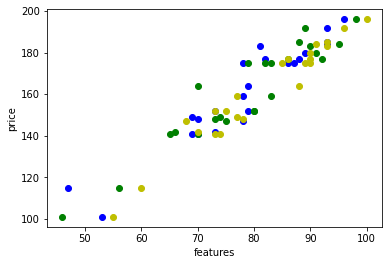

In [4]:
%matplotlib inline
plt.xlabel('features')
plt.ylabel('price')
plt.scatter(x1,y_train,c='b')
plt.scatter(x2,y_train,c='g')
plt.scatter(x3,y_train,c='y')
plt.show()

In [5]:
X_train = np.c_[np.ones((len(X_train),1)),X_train]

In [6]:
print(X_train.shape, y_train.shape)


(23, 4) (23,)


In [7]:
def predict(x,theta):
    return np.dot(x, theta)

In [8]:
def error(x,y,theta):
    y_pre = predict(x,theta)
    return 1/len(x)*(y-y_pre)**2

In [9]:
def compute_cost(x,y,theta):
    errors = error(x,y,theta)
    return 1/(2*m)*np.dot(errors.T, errors)

In [10]:
def gradient_descent(x,y,theta,learning_rate,num_iter,m):  
    cost_list = []
    theta_list = []
    for i in range(num_iter):
        y_pre = predict(x,theta)
        errors = error(x,y,theta)
        cost = compute_cost(x,y,theta)
        cost_list.append(cost)
        theta-= learning_rate*np.dot(np.dot(x, theta) - y, x) / m
        theta_list.append(theta)
    return theta_list, cost_list

In [11]:
learning_rate = 0.0001
m = len(y_train)  
theta = np.random.rand(4)  #initializing theta with some random values
num_iter = 200
#print(error(x_train, y_train,theta))


In [12]:
theta_list, cost_list = gradient_descent(X_train,y_train,theta,learning_rate,num_iter,m)
print(np.array(cost_list))

[24.34735219 18.59278561 16.32236137 12.31256004 11.17531542  8.29336665
  7.82186479  5.6861831   5.59924995  3.97063876  4.09920583  2.82521867
  3.06785782  2.0493725   2.34557012  1.51661544  1.83066355  1.14617117
  1.45742651  0.88573715  1.18270957  0.70094288  0.97769362  0.56885214
  0.82279057  0.47392104  0.70445172  0.40545648  0.61314576  0.35599837
  0.54206008  0.32027564  0.48625399  0.29452238  0.44209745  0.27602287
  0.40689266  0.26280394  0.37861467  0.25342378  0.35573036  0.24682457
  0.33707039  0.24222846  0.32173698  0.23906294  0.30903695  0.23690703
  0.29843225  0.23545185  0.28950329  0.23447169  0.28192136  0.23380262
  0.27542785  0.23332653  0.26981841  0.2329593   0.26493091  0.23264193
  0.26063613  0.23233393  0.25683068  0.23200833  0.25343143  0.23164801
  0.25037126  0.23124295  0.24759573  0.23078814  0.24506048  0.23028212
  0.24272919  0.22972578  0.24057197  0.22912161  0.23856414  0.22847308
  0.23668521  0.2277842   0.23491807  0.22705924  0

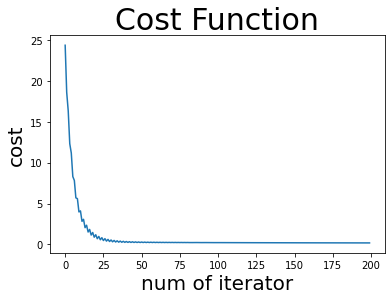

In [13]:
plt.title('Cost Function', size = 30)
plt.xlabel('num of iterator', size = 20)
plt.ylabel('cost', size = 20)
plt.plot(cost_list)
plt.show()

Ta suy ra theta

In [14]:
new_theta = theta_list[-1]
print(new_theta.shape)

(4,)


# Test

In [15]:
df_test = pd.read_csv('data_test.csv').values

In [16]:
X_test = df_test[:,:3]
y_test = df_test[:,3]
X_test = np.c_[np.ones((len(X_test),1)),X_test]

In [17]:
Y_predict_from_test = predict(X_test,new_theta)

In [18]:
print("ta du doan diem tu model",Y_predict_from_test) 
print("diem thuc te", y_test)

ta du doan diem tu model [155.3249503  190.66350082]
diem thuc te [149 192]
